In [1]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "merlin-optical-sar":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt

import src.mvalab as mvalab
import src.vistools as vt

# Saclay

## Saclay OPT

In [2]:
saclayopt = mvalab.imz2mat('source_data/Saclay/TelecomParisOPT.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : source_data/Saclay/TelecomParisOPT.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/3
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 3  verif :  1
1024 1024
-type U16
lecture de  source_data/Saclay/TelecomParisOPT.IMA  en quelconque 1024 1024 3  offset  0 <H 2  complex 0 blocksize 2097152
Boucle de lecture entre 0 et 3   sur 3 canaux
Lecture du canal 1/3
Données réelles. Nouvelle version de imz2mat  <H
Lecture du canal 2/3
Données réelles. Nouvelle version de imz2mat  <H
Lecture du canal 3/3
Données réelles. Nouvelle version de imz2mat  <H
retour tableau 3-D (1024x1024x3)



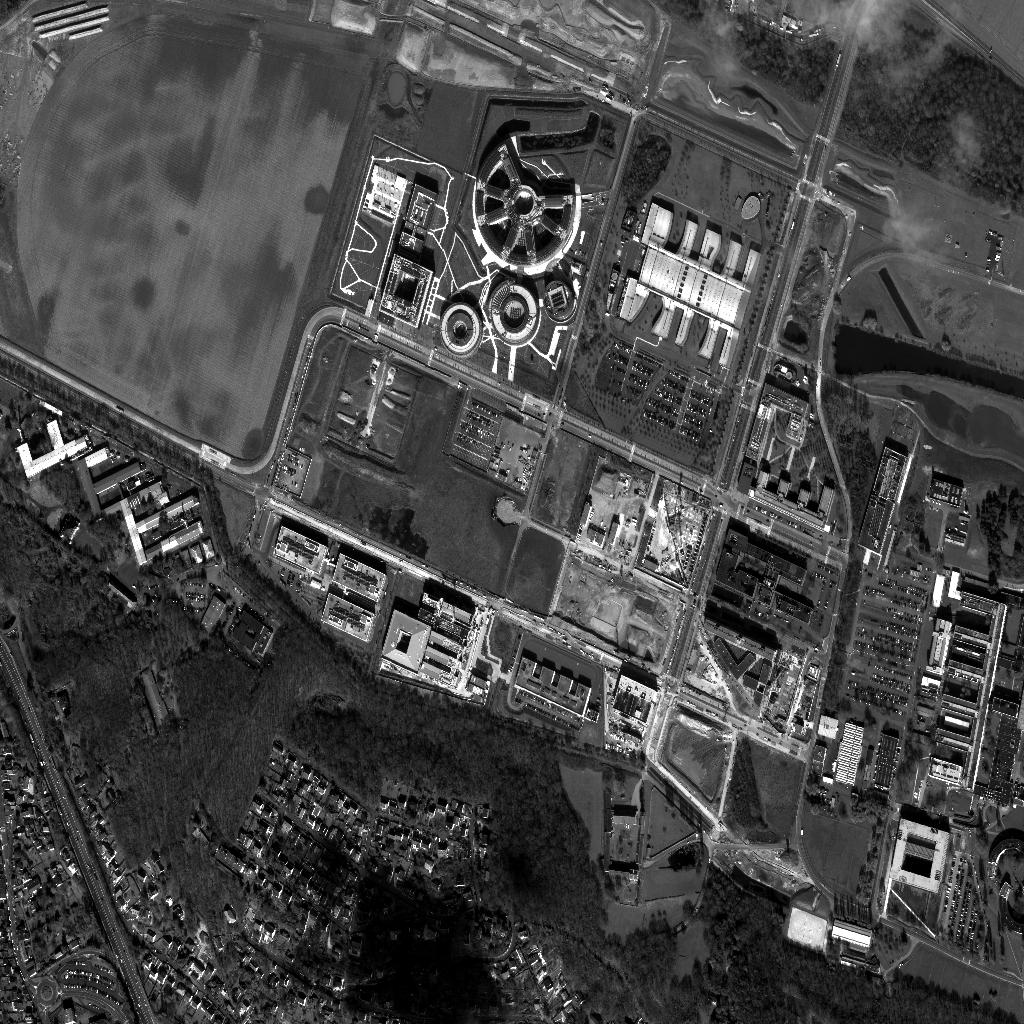
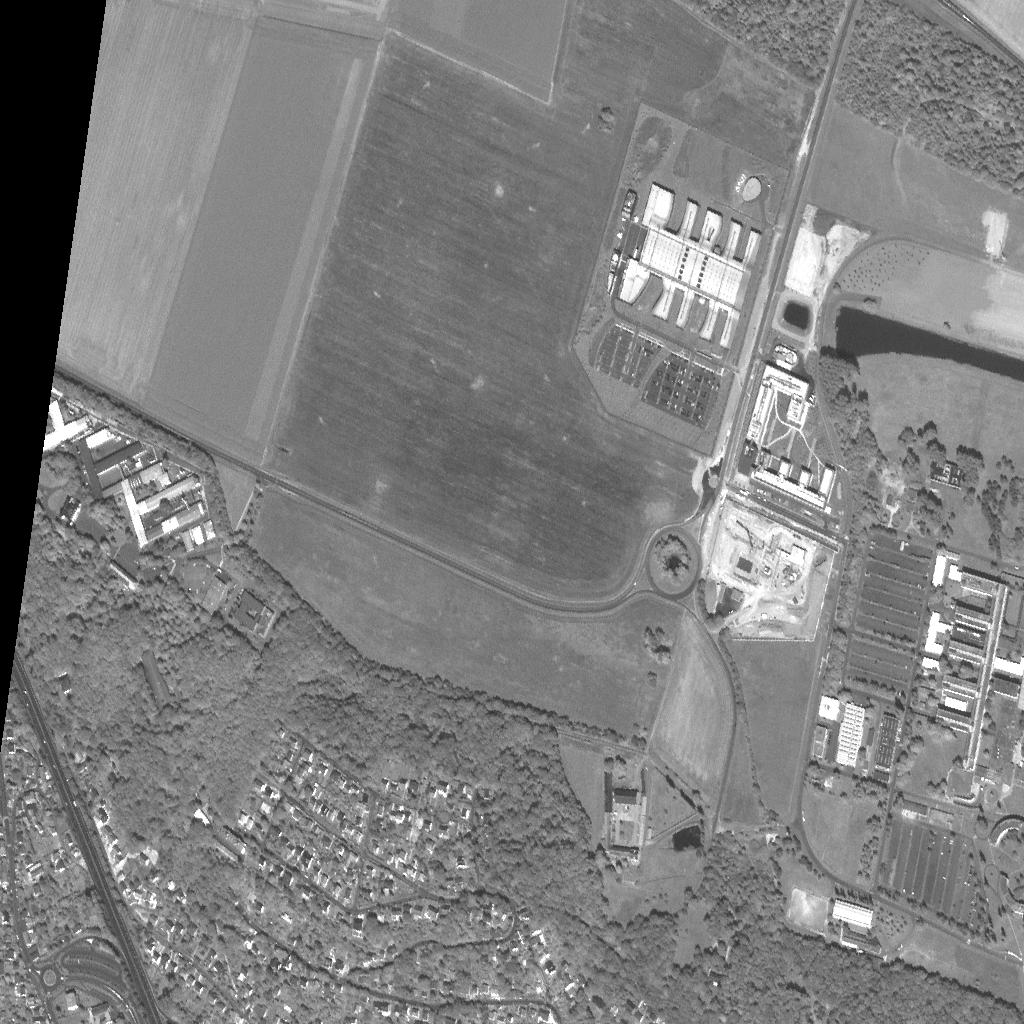
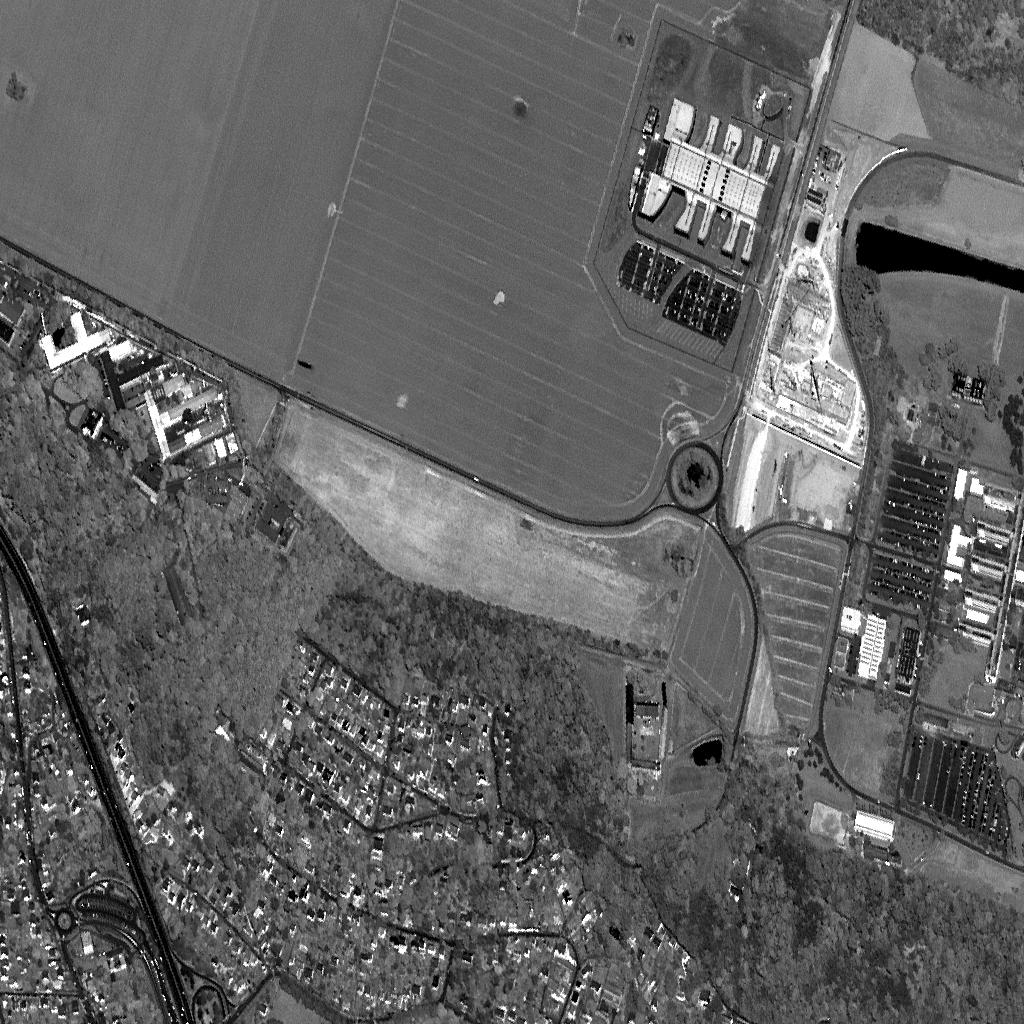

In [3]:
# vmax = 1000
# images = [np.clip(saclayopt[0][:, :, i], None, vmax) / vmax * 255 for i in range(3)]

images = [vt.simple_equalization_8bit(saclayopt[0][:, :, i], 1) for i in range(3)]

vt.display_gallery(images)

## Saclay Z4

In [4]:
saclayz4 = mvalab.imz2mat('source_data/Saclay/TelecomParisZ4.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : source_data/Saclay/TelecomParisZ4.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/5
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 5  verif :  1
1024 1024
-type CFLOAT
lecture de  source_data/Saclay/TelecomParisZ4.IMA  en quelconque 1024 1024 5  offset  0 <f 4  complex 1 blocksize 8388608
Boucle de lecture entre 0 et 5   sur 5 canaux
Lecture du canal 1/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 2/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 3/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 4/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 5/5
Données complexes (standard). Nouvel


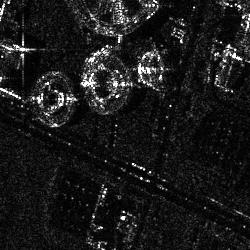
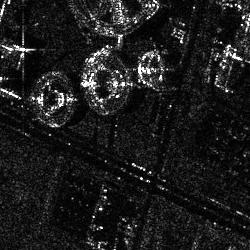
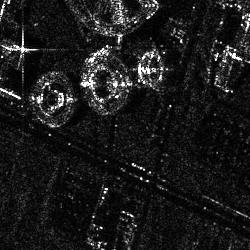
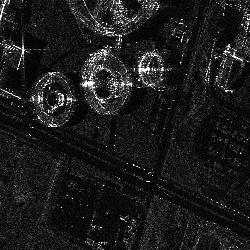
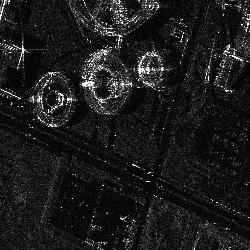

In [5]:
images = [vt.simple_equalization_8bit(np.abs(saclayz4[0][250:500, 250:500, i]), 1) for i in range(5)]

vt.display_gallery(images)

L'image 2 et l'image 3 ont une résolution plus faible. Elles ont été rééchantillonées pour avoir la même taille.

# Sendai

## Sendai OPT

In [6]:
sendaiopt = mvalab.imz2mat('source_data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALOPT.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : source_data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALOPT.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : image monocanal
Dans ximaread : lecture du canal 0/1
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 1  verif :  1
1024 1024
-type U16
lecture de  source_data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALOPT.IMA  en quelconque 1024 1024 1  offset  0 <H 2  complex 0 blocksize 2097152
Données réelles. Nouvelle version de imz2mat  <H


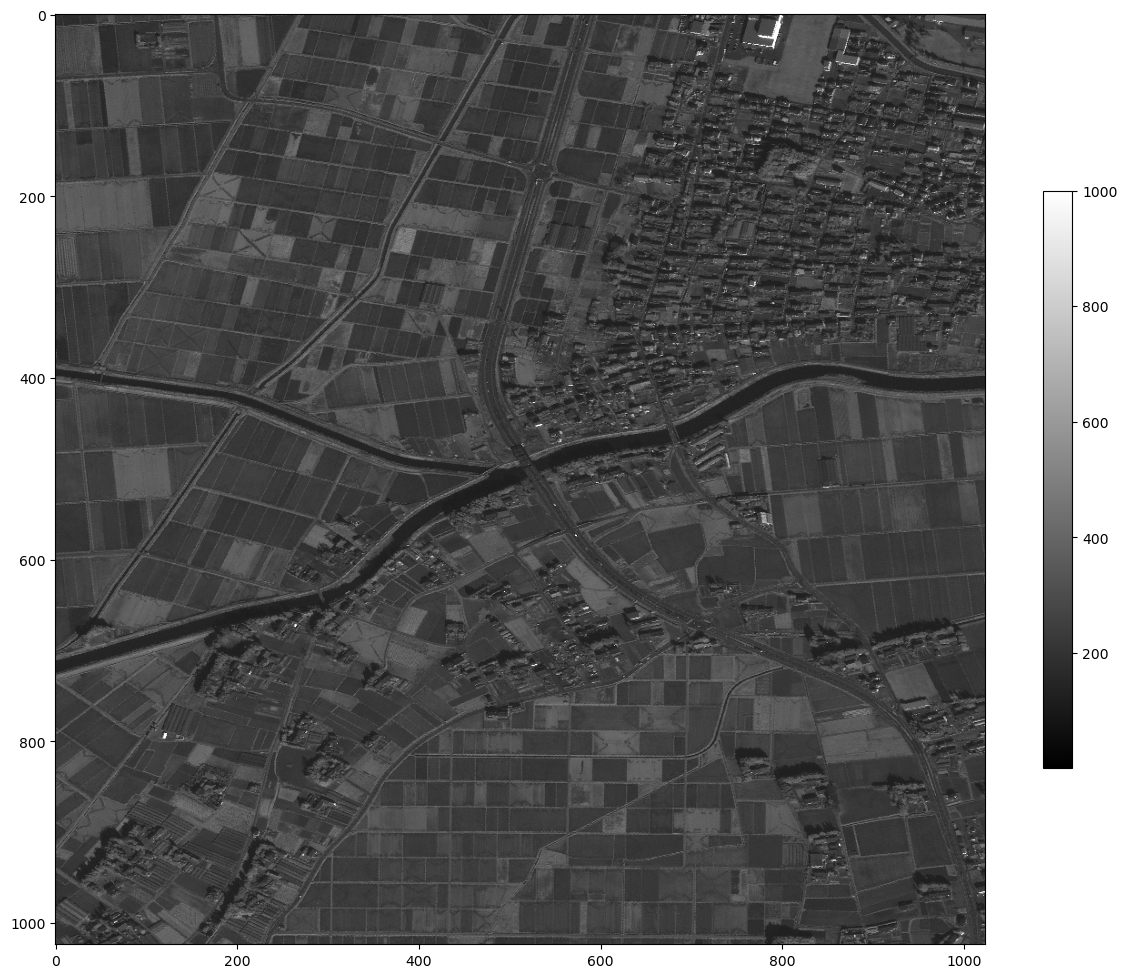

In [7]:
plt.figure(figsize=(15, 15))
plt.imshow(sendaiopt[0], vmax=1000, cmap='gray')
plt.colorbar(shrink=0.5)
plt.show()

## Sendai Z4

In [8]:
sendaiz4 = mvalab.imz2mat('source_data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALZ4.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : source_data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALZ4.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/2
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 2  verif :  1
1024 1024
-type CFLOAT
lecture de  source_data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALZ4.IMA  en quelconque 1024 1024 2  offset  0 <f 4  complex 1 blocksize 8388608
Boucle de lecture entre 0 et 2   sur 2 canaux
Lecture du canal 1/2
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 2/2
Données complexes (standard). Nouvelle version de imz2mat  <f
retour tableau 3-D (1024x1024x2)



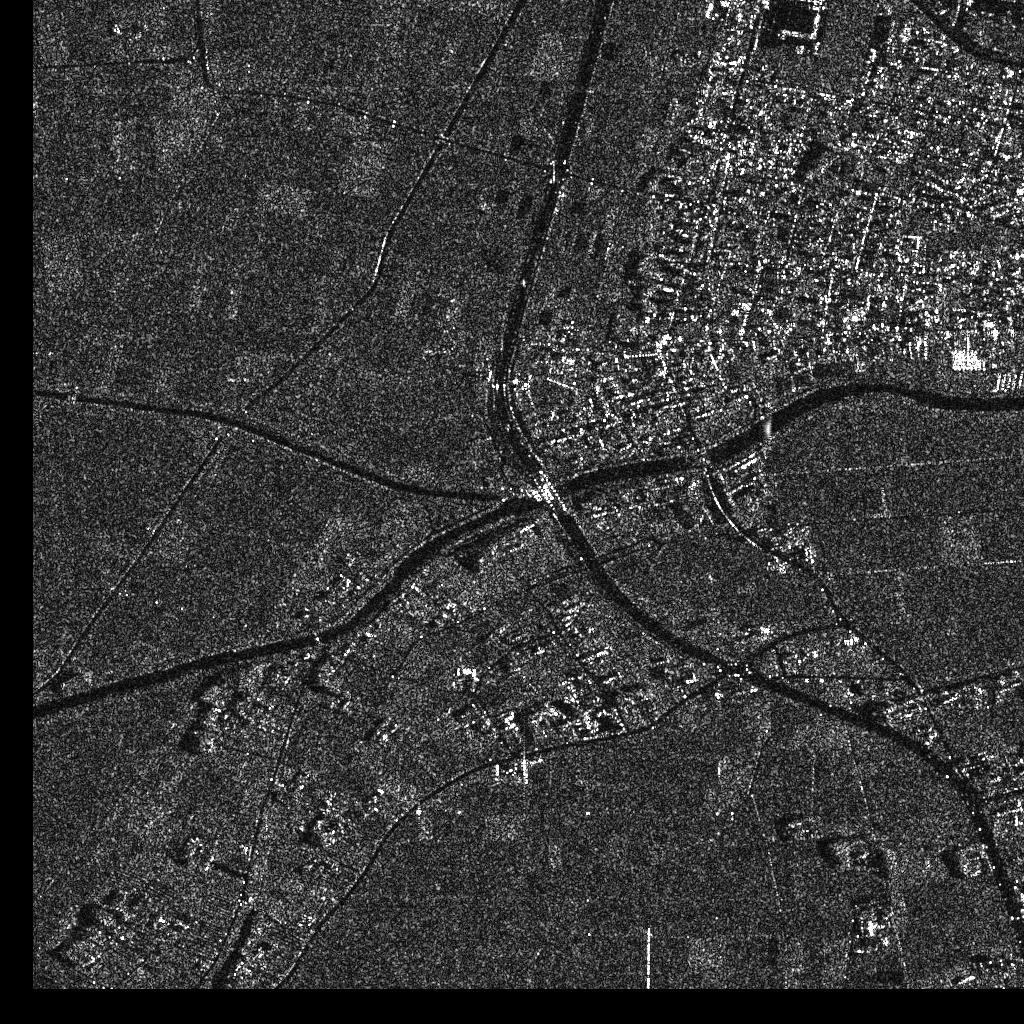
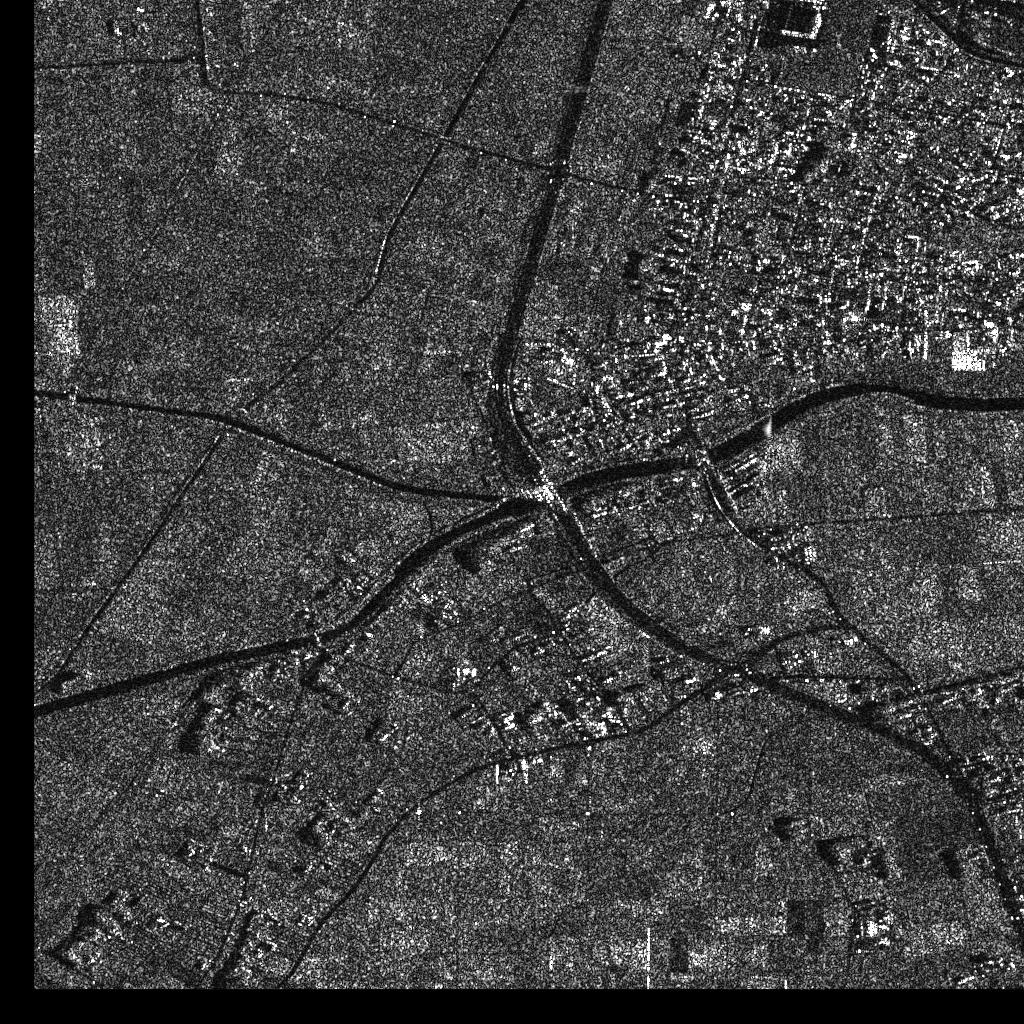

In [9]:
images = [vt.simple_equalization_8bit(np.abs(sendaiz4[0][:, :, i]), 1) for i in range(2)]

vt.display_gallery(images)

# Registration

In [10]:
def compare(im1, im2):
    im1 = vt.simple_equalization_8bit(im1.astype(float), 1)
    im2 = vt.simple_equalization_8bit(im2.astype(float), 1)
    vt.display_gallery([im1, im2])

equalization = vt.simple_equalization_8bit

## Saclay registration

In [11]:
opt0 = saclayopt[0][:, :, 0]
z40 = np.abs(saclayz4[0][:, :, 0])


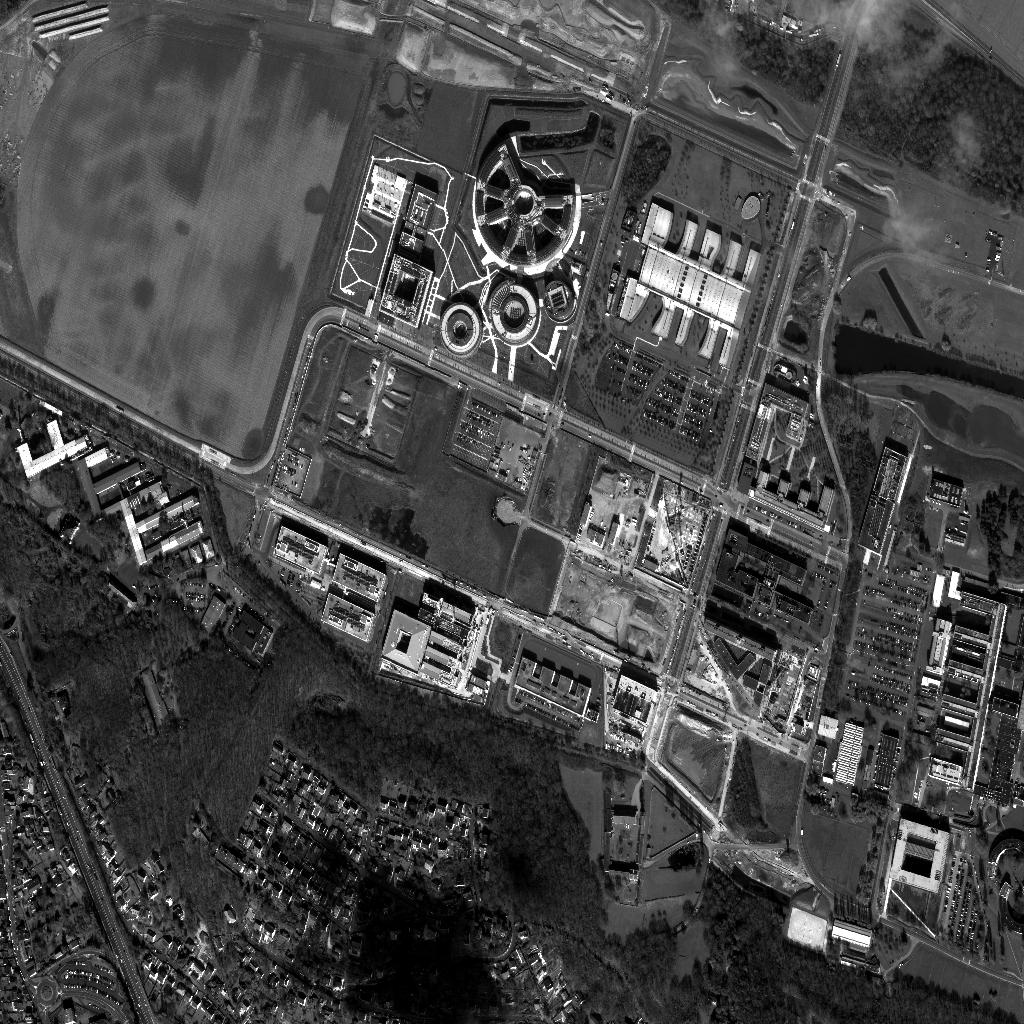
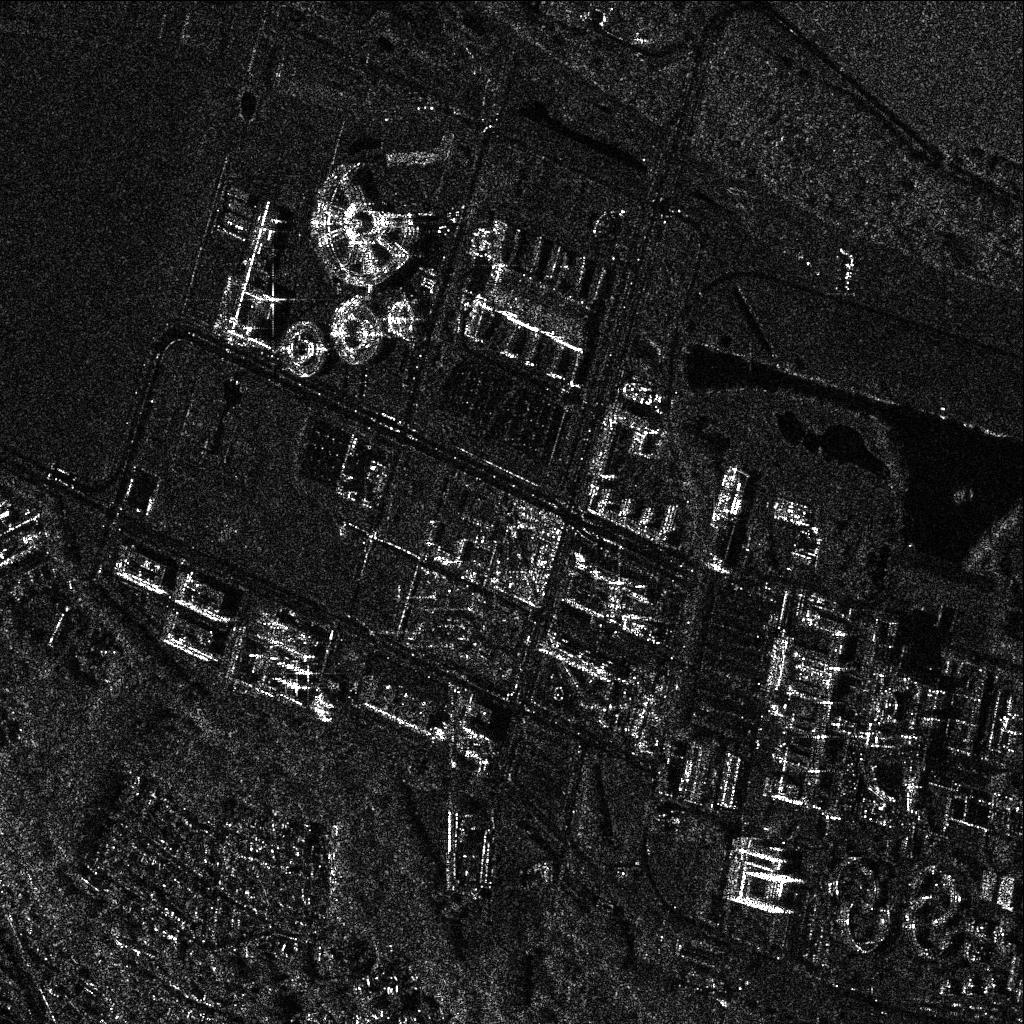

In [12]:
compare(opt0, z40)


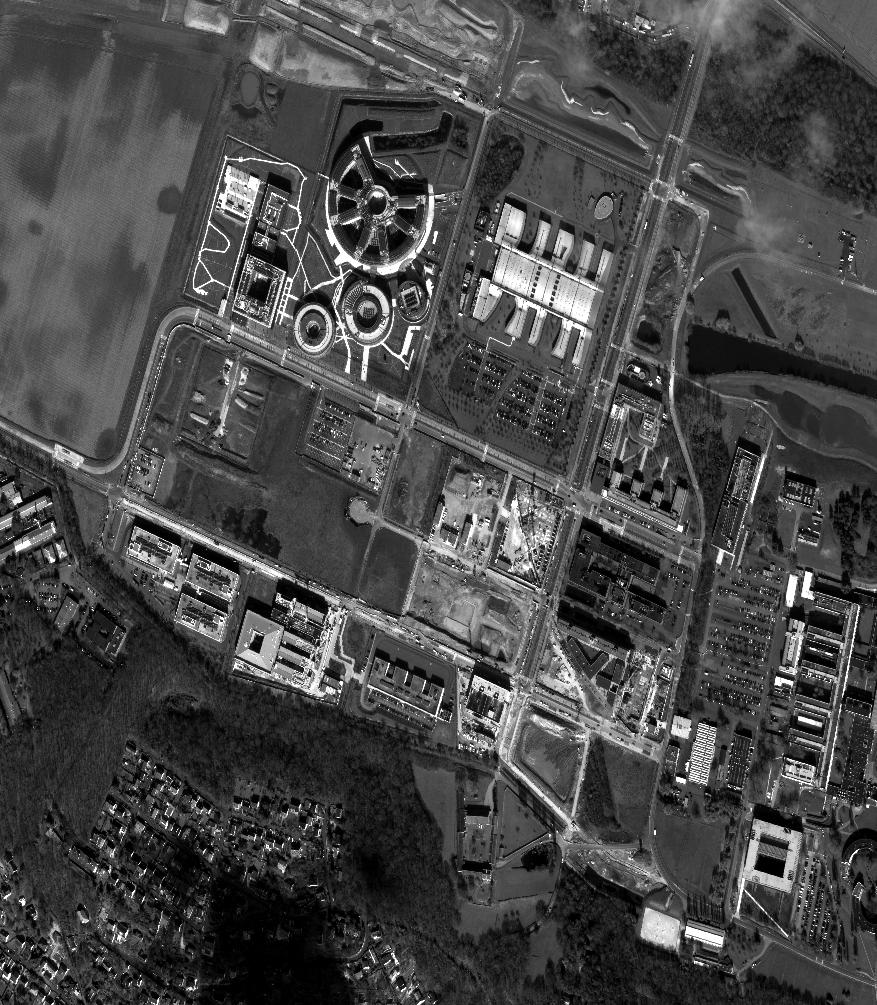
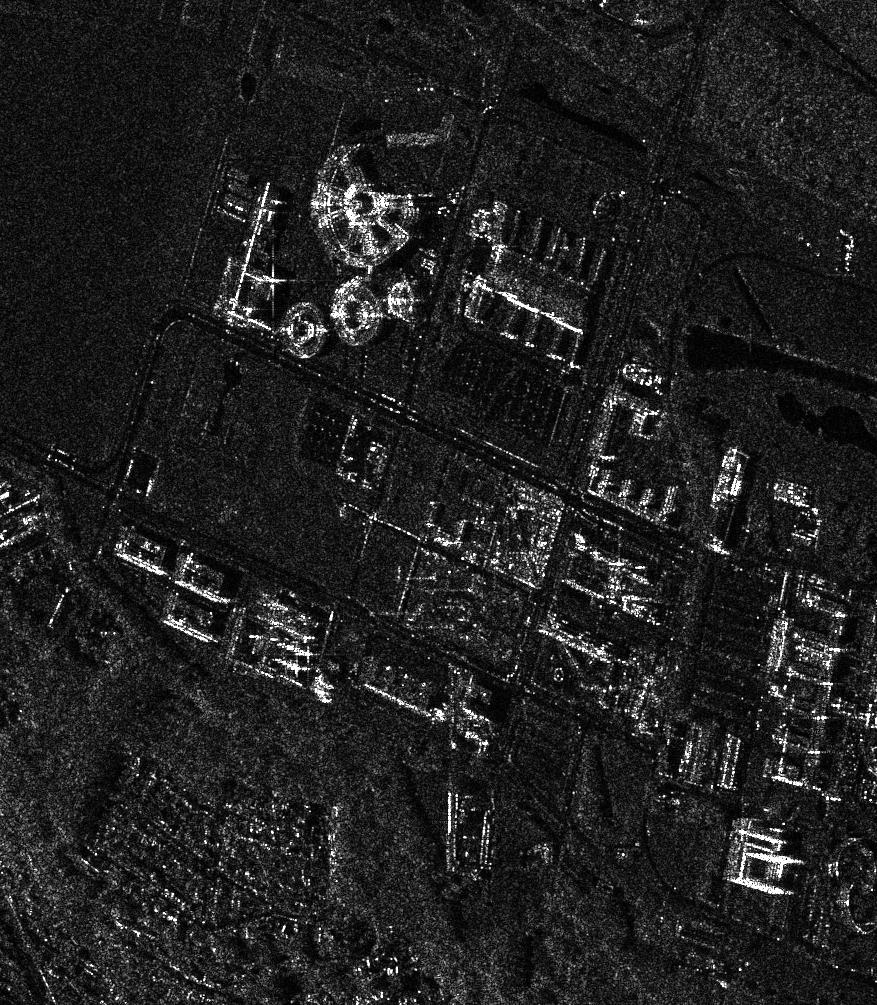

In [13]:
di, dj = -19, 147  # define registering translation
opt0r, z40r = vt.register(opt0, z40, di, dj)  # register images
slice0 = (None, None)                         # full image
slice1 = (slice(250, 500), slice(0, 250))     # road on the left
slice2 = (slice(200, 500), slice(650, None))  # lake
slice3 = (slice(700, 900), slice(500, 700))   # road on the bottom right
slc = slice0  # select slice
compare(opt0r[slc], z40r[slc])

## Sendai registration

In [14]:
opt0 = sendaiopt[0][:988, 33:]
z40 = np.abs(sendaiz4[0][:988, 33:, 0])


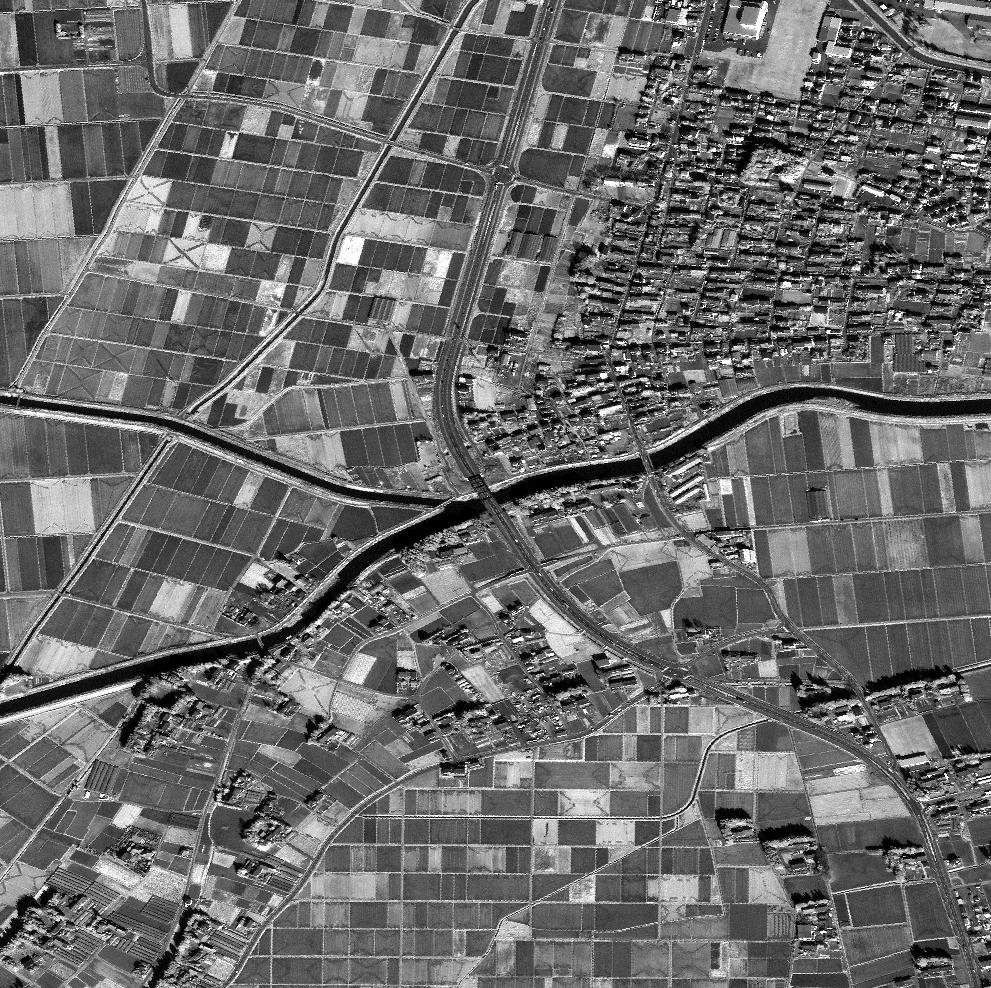
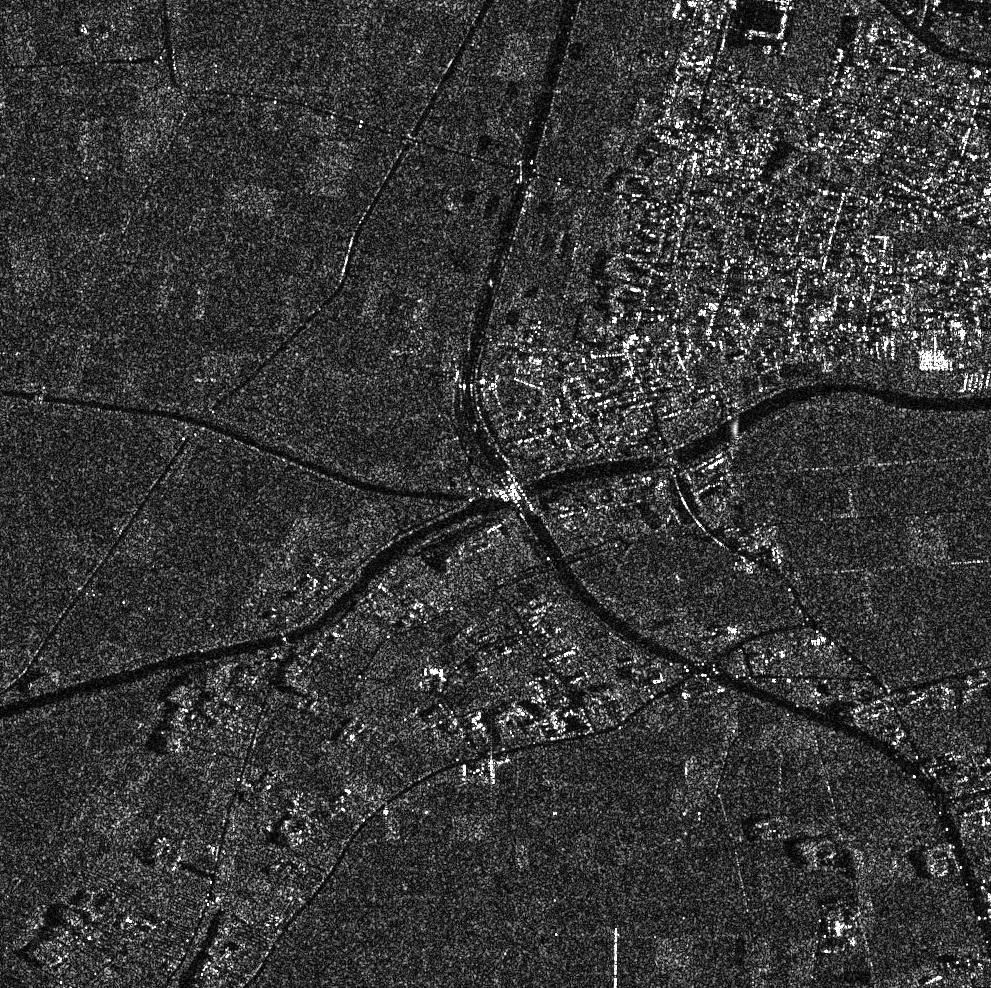

In [15]:
compare(opt0, z40)


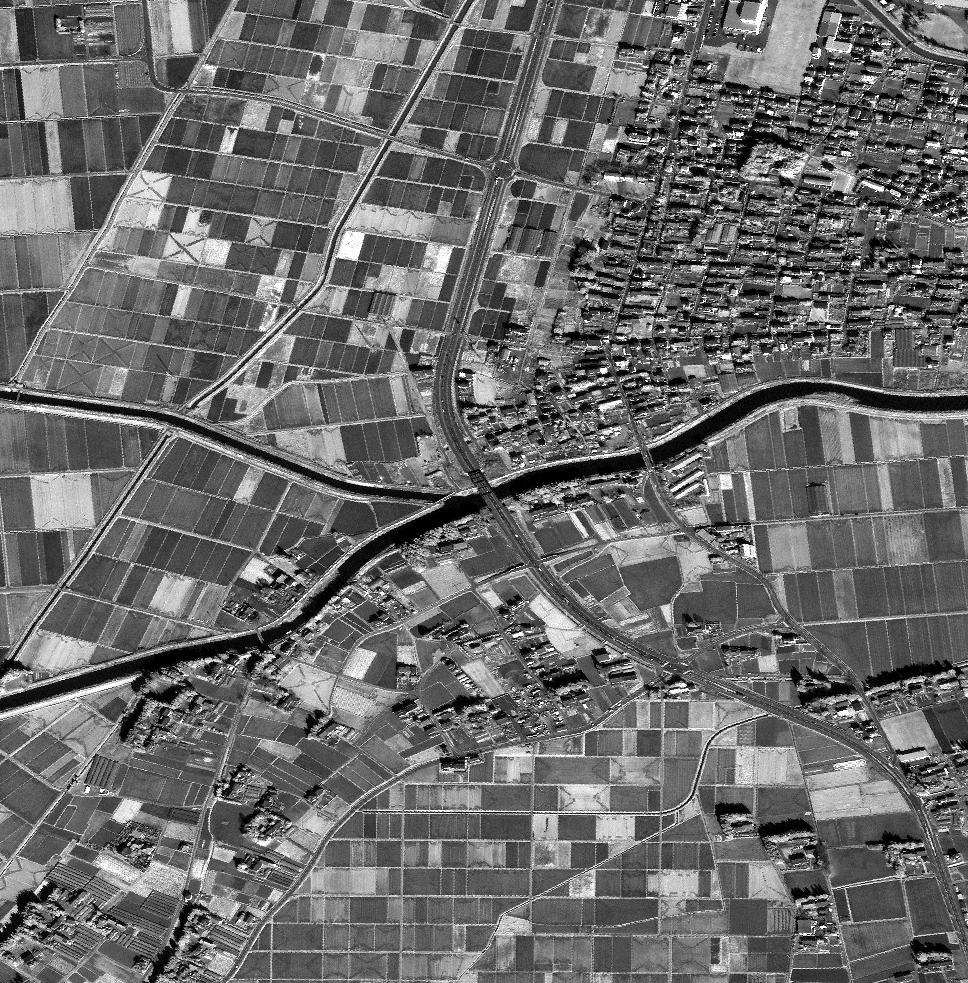
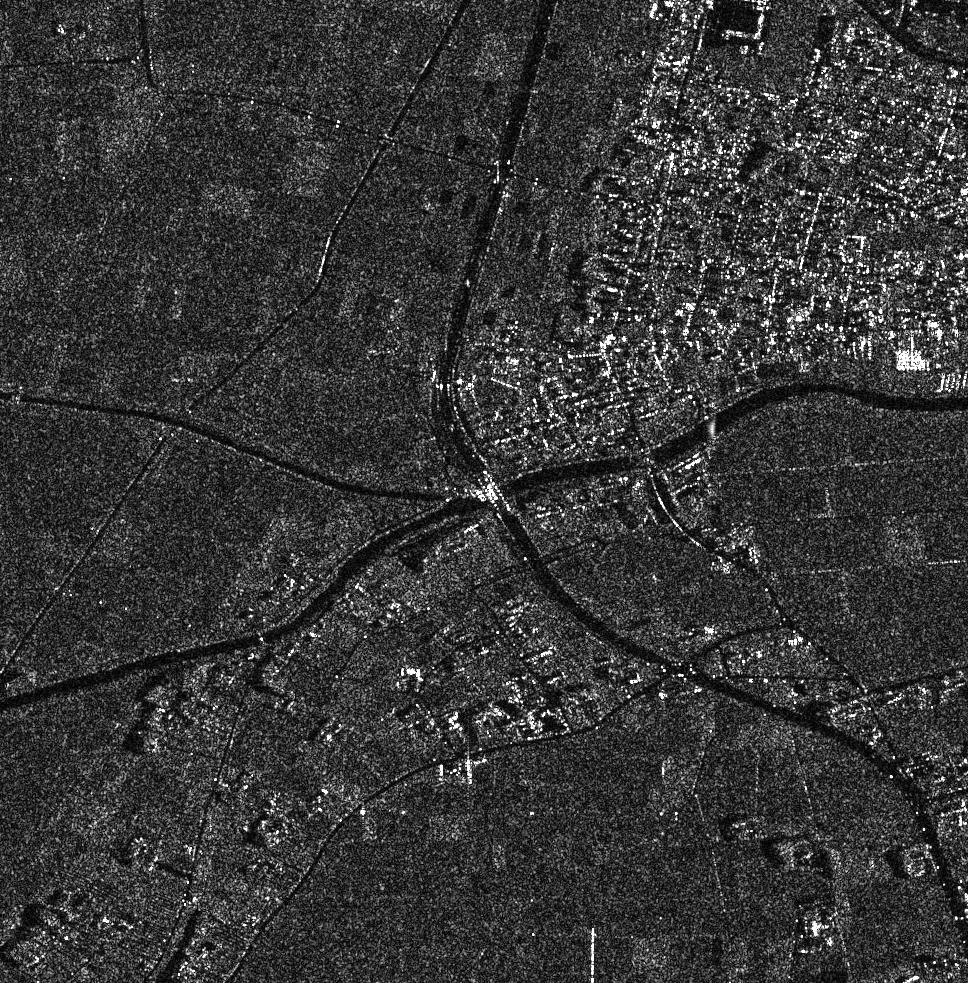

In [16]:
di, dj = 5, -23  # define registering translation
opt0r, z40r = vt.register(opt0, z40, di, dj)  # register images
slice0 = (None, None)                         # full image
slice1 = (slice(250, 500), slice(0, 250))     # intersection
slice2 = (slice(200, 500), slice(650, None))  # village and road
slice3 = (slice(700, 900), slice(500, 700))   # fields
slc = slice0  # select slice
compare(opt0r[slc], z40r[slc])